In [91]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

main_experiments_path = "../experiments"


basic_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp_0.01",
    "mlp_0.001",
    "mlp_0.0001",
    "rbf_full_0.01",
    "rbf_full_0.001",
    "rbf_full_0.0001",
    "rbf_diag_0.01",
    "rbf_diag_0.001",
    "rbf_diag_0.0001",
    "rbf_scal_0.01",
    "rbf_scal_0.001",
    "rbf_scal_0.0001",
    "rbf_univ_0.01",
    "rbf_univ_0.001",
    "rbf_univ_0.0001",
    "ffn_0.1_0.01",
    "ffn_0.1_0.001",
    "ffn_0.1_0.0001",
    "ffn_1_0.01",
    "ffn_1_0.001",
    "ffn_1_0.0001",
    "ffn_10_0.01",
    "ffn_10_0.001",
    "ffn_10_0.0001",
    "uffn_0.1_0.01",
    "uffn_0.1_0.001",
    "uffn_0.1_0.0001",
    "uffn_1_0.01",
    "uffn_1_0.001",
    "uffn_1_0.0001",
    "uffn_10_0.01",
    "uffn_10_0.001",
    "uffn_10_0.0001",
]


basic_condensed_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp",
    "rbf_full",
    "rbf_diag",
    "rbf_scal",
    "rbf_univ",
    "ffn",
    "uffn",
]

method_names = []
condensed_method_names = []
for i in range(2):
    method_names += [str(i+1)+"_"+method for method in basic_method_names]
    condensed_method_names += [str(i+1)+"_"+method for method in basic_condensed_method_names]


datasets = [1,2]
repetition_ids = list(range(8))
learning_rates = ["0.01", "0.001", "0.0001"]
scales = ["0.1", "1", "10"]


experiments_data = xr.DataArray(np.zeros((len(datasets),len(basic_condensed_method_names), len(repetition_ids), len(learning_rates), len(scales))) - 1, coords=[datasets, basic_condensed_method_names, repetition_ids, learning_rates, scales], dims=['datasets','method', 'repetition','lr','scales'])



method_settings = os.listdir(main_experiments_path)

# sort by name

method_settings = sorted(method_settings)

#print all folders in the main experiments path
for method_folder in method_settings:
    # iterate over repetitions

    if method_folder.startswith("."):
        continue

    for repetition_folder in os.listdir(main_experiments_path + "/" + method_folder):
        #print(repetition)
        # iterate over files

        if repetition_folder.startswith("."):
            continue


        try:
            ## read the npy file
            train_loss = np.load(main_experiments_path + "/" + method_folder + "/" + repetition_folder + "/data/" + "train_loss.npy")
            val_loss = np.load(main_experiments_path + "/" + method_folder + "/" + repetition_folder +  "/data/"  + "val_loss.npy")
            test_loss = np.load(main_experiments_path + "/" + method_folder + "/" + repetition_folder + "/data/" + "test_loss.npy")
        except Exception as e:
            print("Error reading files for dataset: ", method_folder, e)
            continue
        
        ### extract the min val loss and pick the corresponding test loss

        min_val_loss = np.min(val_loss)
        min_val_loss_index = np.argmin(val_loss)

        min_test_loss = test_loss[min_val_loss_index]

        min_test_loss = test_loss[min_val_loss_index]
        method_folder_id = int(method_folder.split("_")[1])

        method_description = method_names[method_folder_id - 1]

        method_parts = method_description.split("_")

        dataset_name = int(method_parts[0])
        method_name = method_parts[1]

        repetition_id = int(repetition_folder.split("_")[1])

        #print(method_parts)

        scale = None
        lr = None

        if method_name == "rbf":
            method_name = method_name + "_" + method_parts[2]
            lr = method_parts[-1]
        elif method_name == "ffn" or method_name == "uffn":
            scale = method_parts[2]
            lr = method_parts[-1]
        elif method_name == "mlp":
            lr = method_parts[-1]
            
        #print(dataset_name)

        if lr is None:
            experiments_data.loc[dataset_name, method_name, repetition_id, :,:] = min_test_loss
        elif lr is not None and scale is None:
            experiments_data.loc[dataset_name, method_name, repetition_id, lr,:] = min_test_loss
        else:
            experiments_data.loc[dataset_name, method_name, repetition_id, lr, scale] = min_test_loss




experiments_data = experiments_data.where(experiments_data != -1)


experiments_data

<xarray.DataArray (datasets: 2, method: 10, repetition: 8, lr: 3, scales: 3)> Size: 12kB
array([[[[[1.78272015e-02, 1.78272015e-02, 1.78272015e-02],
          [1.78272015e-02, 1.78272015e-02, 1.78272015e-02],
          [1.78272015e-02, 1.78272015e-02, 1.78272015e-02]],

         [[1.78272015e-02, 1.78272015e-02, 1.78272015e-02],
          [1.78272015e-02, 1.78272015e-02, 1.78272015e-02],
          [1.78272015e-02, 1.78272015e-02, 1.78272015e-02]],

         [[1.78272015e-02, 1.78272015e-02, 1.78272015e-02],
          [1.78272015e-02, 1.78272015e-02, 1.78272015e-02],
          [1.78272015e-02, 1.78272015e-02, 1.78272015e-02]],

         ...,

         [[1.78272015e-02, 1.78272015e-02, 1.78272015e-02],
          [1.78272015e-02, 1.78272015e-02, 1.78272015e-02],
          [1.78272015e-02, 1.78272015e-02, 1.78272015e-02]],

         [[1.78272015e-02, 1.78272015e-02, 1.78272015e-02],
          [1.78272015e-02, 1.78272015e-02, 1.78272015e-02],
...
          [2.65715946e+01, 2.65715946e+01, 2.65716024e+01],
          [2.65715600e+01, 2.65715604e+01, 2.33921639e+01]],

         [[1.56070195e+01, 1.12114997e+01, 2.60277645e+01],
          [1.49228459e+01, 5.52112402e+00, 2.96987969e+01],
          [1.52846851e+01, 6.97846920e+00, 2.85853072e+01]],

         ...,

         [[1.51406584e+01, 8.82869699e+00, 2.86648389e+01],
          [1.14428565e+01, 5.15688425e+00, 2.72161796e+01],
          [1.59467346e+01, 6.79888254e+00, 2.64799420e+01]],

         [[1.52636817e+01, 7.35140301e+00, 2.76589227e+01],
          [1.18149600e+01, 5.21140901e+00, 2.74854415e+01],
          [1.56231343e+01, 6.14487269e+00, 2.74508861e+01]],

         [[1.51439578e+01, 8.81659020e+00, 2.56145203e+01],
          [1.17109690e+01, 5.38047145e+00, 2.62244297e+01],
          [1.54000724e+01, 6.65047053e+00, 2.63428875e+01]]]]])
Coordinates:
  * datasets    (datasets) int64 16B 1 2
  * method      (method) <U9 360B 'svr' 'pls' 'gradboost' ... 'ffn' 'uffn'
  * repetition  (repetition) int64 64B 0 1 2 3 4 5 6 7
  * lr          (lr) <U6 72B '0.01' '0.001' '0.0001'
  * scales      (scales) <U3 36B '0.1' '1' '10'

In [92]:
_experiments_data = experiments_data.copy()


repetition_datasets_mean_data = _experiments_data.mean(dim=['datasets', 'repetition'])

## normalize the data by the mlp mean

min_mlp_mean = repetition_datasets_mean_data.sel(dict(method="mlp")).min()
repetition_datasets_mean_data = repetition_datasets_mean_data / min_mlp_mean
_experiments_data = _experiments_data / min_mlp_mean


repetition_datasets_std_data = _experiments_data.std(dim=['datasets', 'repetition'])

repetition_dim_summary_data = xr.concat([repetition_datasets_mean_data, repetition_datasets_std_data], dim= pd.Index(["mean", "std"], name='summary'))

means = repetition_dim_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim='lr')
min_mean_index = min_mean_index.drop_vars('summary')
min_mean_index = min_mean_index.squeeze()


collapsed_repetition_datasets_summary_data = repetition_dim_summary_data.isel(lr=min_mean_index, missing_dims="ignore")
collapsed_repetition_datasets_summary_data = collapsed_repetition_datasets_summary_data.drop_vars(['lr'])



means = collapsed_repetition_datasets_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim='scales')
min_mean_index = min_mean_index.drop_vars('summary')
min_mean_index = min_mean_index.squeeze()

collapsed_repetition_datasets_summary_data = collapsed_repetition_datasets_summary_data.isel(scales=min_mean_index, missing_dims="ignore")
collapsed_repetition_datasets_summary_data = collapsed_repetition_datasets_summary_data.drop_vars(['scales'])




collapsed_repetition_datasets_summary_data

<xarray.DataArray (summary: 2, method: 10)> Size: 160B
array([[3.25433446e-03, 3.66904342e-03, 2.60052825e-03, 1.00000000e+00,
        9.77095974e-01, 9.77095974e-01, 9.77559246e-01, 7.68078344e-01,
        6.41878060e-01, 6.18217271e-01],
       [1.58085796e-03, 1.15047459e-03, 8.88690126e-04, 4.51113083e-01,
        5.77876189e-01, 5.77876189e-01, 5.80009911e-01, 5.06573707e-01,
        4.90356422e-01, 4.85296967e-01]])
Coordinates:
  * method   (method) <U9 360B 'svr' 'pls' 'gradboost' ... 'ffn' 'uffn'
  * summary  (summary) object 16B 'mean' 'std'

In [93]:
_experiments_data = experiments_data.copy()

### average over repetitions and pick the min value across learning rates
repetition_mean_data = _experiments_data.mean(dim='repetition')
min_mlp_mean = repetition_mean_data.sel(dict(method="mlp")).min(dim=['lr', 'scales'])

print("min mlp ",min_mlp_mean.shape, "min mlp", min_mlp_mean)
repetition_mean_data = repetition_mean_data / min_mlp_mean

_experiments_data = _experiments_data / min_mlp_mean 
repetition_std_data = _experiments_data.std(dim='repetition')

## combine mean and std into one xarray

repetition_summary_data = xr.concat([repetition_mean_data, repetition_std_data], dim= pd.Index(["mean", "std"], name='summary'))

### now keep the min mean value across learning rates for each method and data dimension combination and also keep the corresponding std value 
#min_mean_lr = repetition_summary_data.loc[dict(summary='mean')].argmin(dim='lr')

means = repetition_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim='lr')
min_mean_index = min_mean_index.drop_vars('summary')
min_mean_index = min_mean_index.squeeze()

collapsed_repetition_summary_data = repetition_summary_data.isel(lr=min_mean_index, missing_dims="ignore")
collapsed_repetition_summary_data = collapsed_repetition_summary_data.drop_vars(['lr'])


means = collapsed_repetition_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim='scales')
min_mean_index = min_mean_index.drop_vars('summary')
min_mean_index = min_mean_index.squeeze()

collapsed_repetition_summary_data = collapsed_repetition_summary_data.isel(scale=min_mean_index, missing_dims="ignore")
collapsed_repetition_summary_data = collapsed_repetition_summary_data.drop_vars(['scales'])




collapsed_repetition_summary_data

min mlp  (2,) min mlp <xarray.DataArray (datasets: 2)> Size: 16B
array([ 5.87661885, 15.42897044])
Coordinates:
  * datasets  (datasets) int64 16B 1 2
    method    <U9 36B 'mlp'


<xarray.DataArray (summary: 2, datasets: 2, method: 10, scales: 3)> Size: 960B
array([[[[3.03358138e-03, 3.03358138e-03, 3.03358138e-03],
         [4.56551587e-03, 4.56551587e-03, 4.56551587e-03],
         [3.10312110e-03, 3.10312110e-03, 3.10312110e-03],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [8.44241744e-01, 8.44241744e-01, 8.44241744e-01],
         [8.44241744e-01, 8.44241744e-01, 8.44241744e-01],
         [8.42016756e-01, 8.42016756e-01, 8.42016756e-01],
         [7.66572130e-01, 7.66572130e-01, 7.66572130e-01],
         [1.20547015e+00, 7.77227166e-01, 8.66855162e-01],
         [1.27071114e+00, 8.70386710e-01, 7.52881590e-01]],

        [[3.33841536e-03, 3.33841536e-03, 3.33841536e-03],
         [3.32759310e-03, 3.32759310e-03, 3.32759310e-03],
         [2.40909962e-03, 2.40909962e-03, 2.40909962e-03],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.02769777e+00, 1.02769777e+00, 1.02769777e+00],
         [1.02769777e+00, 1.02769777e+00, 1.02769777e+00],
         [1.02918496e+00, 1.02918496e+00, 1.02918496e+00],
         [7.68652034e-01, 7.68652034e-01, 7.68652034e-01],
         [8.54993782e-01, 5.90326007e-01, 1.72012491e+00],
...
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [7.81829305e-19, 7.81829305e-19, 7.81829305e-19],
         [6.92572297e-02, 6.92572297e-02, 6.92572297e-02],
         [1.12959653e-02, 1.12959653e-02, 1.12959653e-02],
         [1.12959653e-02, 1.12959653e-02, 1.12959653e-02],
         [1.01672762e-02, 1.01672762e-02, 1.01672762e-02],
         [1.35086001e-02, 1.35086001e-02, 1.35086001e-02],
         [5.01327487e-02, 1.54275688e-02, 5.61719948e-02],
         [3.97744918e-02, 3.01155463e-02, 1.20715050e-02]],

        [[4.33680869e-19, 4.33680869e-19, 4.33680869e-19],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [4.33680869e-19, 4.33680869e-19, 4.33680869e-19],
         [4.09151921e-02, 4.09151921e-02, 4.09151921e-02],
         [2.62771673e-01, 2.62771673e-01, 2.62771673e-01],
         [2.62771673e-01, 2.62771673e-01, 2.62771673e-01],
         [2.64114891e-01, 2.64114891e-01, 2.64114891e-01],
         [3.61974423e-01, 3.61974423e-01, 3.61974423e-01],
         [3.36137455e-01, 4.31172474e-01, 5.81837440e-03],
         [2.97772449e-01, 4.54132173e-01, 2.19740391e-01]]]])
Coordinates:
  * datasets  (datasets) int64 16B 1 2
  * method    (method) <U9 360B 'svr' 'pls' 'gradboost' ... 'ffn' 'uffn'
  * summary   (summary) object 16B 'mean' 'std'
Dimensions without coordinates: scales

In [94]:
method_renaming = {
    "svr": "SVR",
    "gradboost": "GradBoost",
    "mlp": "MLP",
    "rbf_full": "RBF Full",
    "rbf_diag": "RBF Diag",
    "rbf_scal": "RBF Scal",
    "rbf_univ": "U-RBF",
    "ffn": "FFM",
    "uffn": "U-FFM",
}


dataset_renaming ={
    1: "natural",
    2: "text"
}

### rename the method coords and only keep the methods that have a mapping

collapsed_repetition_summary_data = collapsed_repetition_summary_data.sel(dict(method=[key for key in method_renaming.keys() if key in collapsed_repetition_summary_data.method.values]))#.sel(method=[key for key in method_renaming.keys() if key in method_renaming.keys()])
collapsed_repetition_summary_data.coords['method'] = [method_renaming[method] for method in collapsed_repetition_summary_data.method.values]


mean_summary_data = collapsed_repetition_summary_data.sel(summary="mean")
std_summary_data = collapsed_repetition_summary_data.sel(summary="std") 



mean_df = mean_summary_data.to_dataframe(name='value').reset_index()
mean_df = mean_df.pivot_table(index='datasets', columns='method', values='value', aggfunc=lambda x: list(x)[0])

std_df = std_summary_data.to_dataframe(name='value').reset_index()
std_df = std_df.pivot_table(index='datasets', columns='method', values='value', aggfunc=lambda x: list(x)[0])


## rename the row index 
mean_df.index = [dataset_renaming[dim] + " m"  for dim in mean_df.index]
std_df.index = [dataset_renaming[dim]  + " s"  for dim in std_df.index]


### merge the mean and std dataframes into one and alternate the rows

final_df = pd.concat([mean_df, std_df], axis=0)
final_df = final_df.sort_index()

### add the average row at the end

collapsed_repetition_datasets_summary_data = collapsed_repetition_datasets_summary_data.sel(dict(method=[key for key in method_renaming.keys() if key in collapsed_repetition_datasets_summary_data.method.values]))#.sel(method=[key for key in method_renaming.keys() if key in method_renaming.keys()])
collapsed_repetition_datasets_summary_data.coords['method'] = [method_renaming[method] for method in collapsed_repetition_datasets_summary_data.method.values]

mean_datasets_summary_data = collapsed_repetition_datasets_summary_data.sel(summary="mean")
std_datasets_summary_data = collapsed_repetition_datasets_summary_data.sel(summary="std")

mean_datasets_summary_data = mean_datasets_summary_data.to_dataframe(name='value').reset_index()
mean_datasets_summary_data = mean_datasets_summary_data.pivot_table( columns='method', values='value', aggfunc=lambda x: list(x)[0])

std_datasets_summary_data = std_datasets_summary_data.to_dataframe(name='value').reset_index()
std_datasets_summary_data = std_datasets_summary_data.pivot_table( columns='method', values='value', aggfunc=lambda x: list(x)[0])


## rename the row index
mean_datasets_summary_data.index = [str(dim) + " m"  for dim in mean_datasets_summary_data.index]
std_datasets_summary_data.index = [str(dim) + " s"  for dim in std_datasets_summary_data.index]


final_datasets_summary_df = pd.concat([mean_datasets_summary_data, std_datasets_summary_data], axis=0)
final_datasets_summary_df = final_datasets_summary_df.sort_index()

final_df = pd.concat([final_df, final_datasets_summary_df], axis=0)


### sort the methods according to the order in the method names list

final_df = final_df[method_renaming.values()]

final_df

method,SVR,GradBoost,MLP,RBF Full,RBF Diag,RBF Scal,U-RBF,FFM,U-FFM
natural m,3.033581e-03,3.103121e-03,1.000000,0.844242,0.844242,0.842017,0.766572,1.205470,1.270711
natural s,0.000000e+00,7.818293e-19,0.069257,0.011296,0.011296,0.010167,0.013509,0.050133,0.039774
text m,3.338415e-03,2.409100e-03,1.000000,1.027698,1.027698,1.029185,0.768652,0.854994,0.969142
text s,4.336809e-19,4.336809e-19,0.040915,0.262772,0.262772,0.264115,0.361974,0.336137,0.297772
value m,3.254334e-03,2.600528e-03,1.000000,0.977096,0.977096,0.977559,0.768078,0.641878,0.618217
value s,1.580858e-03,8.886901e-04,0.451113,0.577876,0.577876,0.580010,0.506574,0.490356,0.485297


In [95]:
## print the final df to a latex table

formatted_df = final_df.copy()

### format the values to 2 decimal places
formatted_df = formatted_df.map(lambda x: "{:.4f}".format(x))

## all rows that end with s in the index need values with brackets around them

formatted_df.loc[formatted_df.index.str.endswith(" s"), :] = formatted_df.loc[formatted_df.index.str.endswith(" s"), :].map(lambda x: "(± " + x + ")")

formatted_df.index = ["" if dim.endswith(" s") else "\multirow{2}{*}{" +dim.replace(' m','')+"}" for dim in formatted_df.index]

formatted_df.index = [dim.replace("value", "average") for dim in formatted_df.index]


latex = formatted_df.to_latex(float_format="%.3f", escape=False, column_format="l" + "c" * formatted_df.shape[1])

latex = latex.replace("_", "\_")

latex = latex.replace("method", "")

print(latex)

\begin{tabular}{lccccccccc}
\toprule
 & SVR & GradBoost & MLP & RBF Full & RBF Diag & RBF Scal & U-RBF & FFM & U-FFM \\
\midrule
\multirow{2}{*}{natural} & 0.0030 & 0.0031 & 1.0000 & 0.8442 & 0.8442 & 0.8420 & 0.7666 & 1.2055 & 1.2707 \\
 & (± 0.0000) & (± 0.0000) & (± 0.0693) & (± 0.0113) & (± 0.0113) & (± 0.0102) & (± 0.0135) & (± 0.0501) & (± 0.0398) \\
\multirow{2}{*}{text} & 0.0033 & 0.0024 & 1.0000 & 1.0277 & 1.0277 & 1.0292 & 0.7687 & 0.8550 & 0.9691 \\
 & (± 0.0000) & (± 0.0000) & (± 0.0409) & (± 0.2628) & (± 0.2628) & (± 0.2641) & (± 0.3620) & (± 0.3361) & (± 0.2978) \\
\multirow{2}{*}{average} & 0.0033 & 0.0026 & 1.0000 & 0.9771 & 0.9771 & 0.9776 & 0.7681 & 0.6419 & 0.6182 \\
 & (± 0.0016) & (± 0.0009) & (± 0.4511) & (± 0.5779) & (± 0.5779) & (± 0.5800) & (± 0.5066) & (± 0.4904) & (± 0.4853) \\
\bottomrule
\end{tabular}



method        SVR  GradBoost  MLP  RBF Full  RBF Diag  RBF Scal     U-RBF  \
natural  0.003034   0.003103  1.0  0.844242  0.844242  0.842017  0.766572   

method       FFM     U-FFM  
natural  1.20547  1.270711  
[[0.00303358 0.00310312 1.         0.84424174 0.84424174 0.84201676
  0.76657213 1.20547015 1.27071114]]


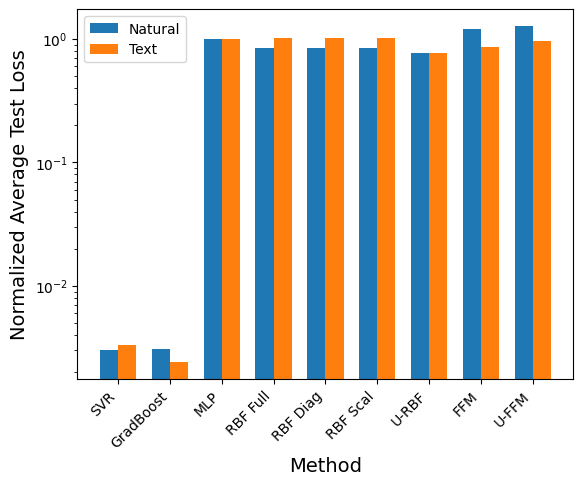

In [96]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

final_df_mean = final_df.loc[final_df.index.str.endswith(" m"), :]

## remove the m from the index
final_df_mean.index = [dim.replace(' m','') for dim in final_df_mean.index]

## remove the row that has the average values
final_df_mean = final_df_mean.drop("value")

## plot bar charts for the mean values for each dataset and method in a single chart
## plot two bars next to each other for each dataset 


natural_df = final_df_mean.loc["natural"].to_frame().reset_index()
text_df = final_df_mean.loc["text"].to_frame().reset_index()

natural_df = natural_df.set_index("method")
text_df = text_df.set_index("method")

## put methods as columns

natural_df = natural_df.T
text_df = text_df.T


print(natural_df)
print(natural_df.values)


fig, ax = plt.subplots()
bar_width = 0.35

### I have a df with n column and 2 rows I want to plot n bars for each row in the same plot and for each method 2 bars next to each other
ax.bar(np.arange(len(natural_df.columns)), natural_df.values[0], bar_width, color=colors[0], label="Natural")
ax.bar(np.arange(len(text_df.columns)) + bar_width, text_df.values[0], bar_width, color=colors[1], label="Text")

ax.set_xticks(np.arange(len(natural_df.columns)) + bar_width / 2)
ax.set_xticklabels(natural_df.columns, rotation=45, ha="right")
ax.set_xlabel("Method", fontsize=14)

ax.set_ylabel("Normalized Average Test Loss", fontsize=14)

ax.set_yscale("log")
ax.legend()

plt.savefig("../../../assets/v2image_ffm_bar_chart.pdf", format="pdf", bbox_inches='tight')
plt.show()


              value
method             
SVR        0.003254
GradBoost  0.002601
MLP        1.000000
RBF Full   0.977096
RBF Diag   0.977096
RBF Scal   0.977559
U-RBF      0.768078
FFM        0.641878
U-FFM      0.618217


/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_13304/2821982859.py:39: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


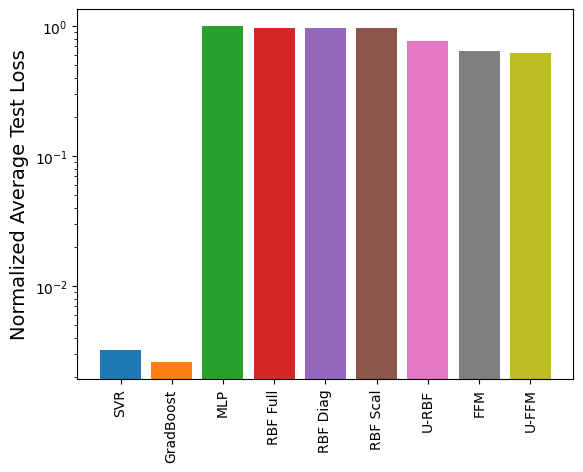

In [97]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]



mean_repetition_datasets_df = collapsed_repetition_datasets_summary_data.sel(summary="mean").to_dataframe(name='value').reset_index()
mean_repetition_datasets_df = mean_repetition_datasets_df.pivot_table(index='method',  values='value', aggfunc=lambda x: list(x)[0])
#mean_repetition_datasets_df = mean_repetition_datasets_df.drop("pls")

mean_repetition_datasets_df = mean_repetition_datasets_df.rename(index=method_renaming)
## sort the index by the order in the method names list
mean_repetition_datasets_df = mean_repetition_datasets_df.reindex(method_renaming.values())


## normalize the data by the mlp value
mean_repetition_datasets_df = mean_repetition_datasets_df / mean_repetition_datasets_df.loc["MLP"]



print(mean_repetition_datasets_df)

###               value
# method             
# SVR        4.031763
# GradBoost  0.528505
# MLP        1.000000
# RBF Full   0.691842
# RBF Diag   0.691842
# RBF Scal   3.681355
# U-RBF      0.566239
# FFM        3.796245
# U-FFM      0.662704


## plot this in a colored bar chart
plt.bar(mean_repetition_datasets_df.index, mean_repetition_datasets_df.value, color=colors)

plt.ylabel("Normalized Average Test Loss",fontsize=14)
plt.yscale("log")
plt.ylim(bottom=0)
plt.xticks(rotation=90)

plt.savefig("../../../assets/image_dataset_summary.pdf", format="pdf", bbox_inches='tight')


plt.show()


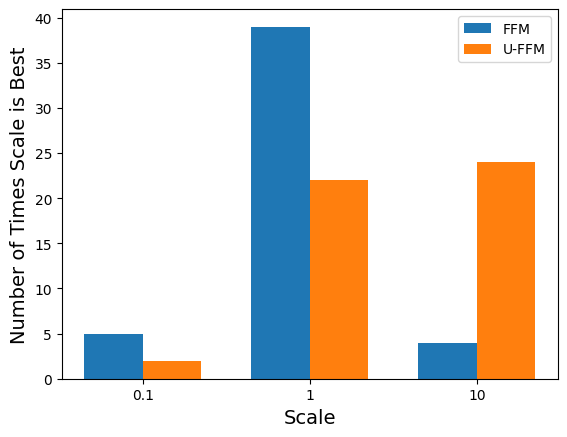

In [98]:
### only keep the ffn and uffn method

ffn_experiments_data = experiments_data.sel(dict(method=["ffn"]))
uffn_experiments_data = experiments_data.sel(dict(method=["uffn"]))

### print a histogram of how often each scale is the best across datasets, repetitions and learning rates
ffn_min_loss_index = ffn_experiments_data.argmin(dim='scales')
uffn_min_loss_index = uffn_experiments_data.argmin(dim='scales')


## count the number of times each scale is the best
ffn_min_loss_index  = ffn_min_loss_index.values.flatten()
unique, counts = np.unique(ffn_min_loss_index, return_counts=True)

uffn_min_loss_index  = uffn_min_loss_index.values.flatten()
unique, counts_uffn = np.unique(uffn_min_loss_index, return_counts=True)


### plot the histogram of the counts for ffn and uffn in separate bars with different colors


fig, ax = plt.subplots()
bar_width = 0.35
bar_widths = np.arange(len(unique))

ax.bar(bar_widths, counts, bar_width, label='FFM', color=colors[0])
ax.bar(bar_widths + bar_width, counts_uffn, bar_width, label='U-FFM', color=colors[1])

ax.set_xticks(bar_widths + bar_width / 2)
ax.set_xticklabels(["0.1", "1", "10"])
ax.set_xlabel("Scale", fontsize=14)

ax.set_ylabel("Number of Times Scale is Best", fontsize=14)
ax.legend()

#plt.title("Best Scale across Datasets, Repetitions and Learning Rates", fontsize=14)

plt.savefig("../../../assets/v2image_ffm_scale_histogram.pdf", format="pdf", bbox_inches='tight')
plt.show()